![Datafain's logo](https://github.com/Ridzy619/Datafain/blob/master/Courses/Data%20Science%20Fundamentals/Day%201/Datafain%20logo.jpg?raw=true)

# Linear Regression with Python

This notebook illustration is part of [Datafain's](https://www.datafain.com) Fundamentals of Data Science Intermediate program delivered on 23/10/2020. The powerpoint presentation can be found in this [link](https://docs.google.com/presentation/d/1SfCxdMHKdaPS_tQIRA7YGM5QG4L5oAaskNbUKXGSp3o/edit?usp=sharing)


The course was prepared by [Ridwan Salahuddeen](https://linkedin.com/in/ridwan-salahuddeen).

# Task Background
>In this notebook, we shall analyse build a model that estimates the likely carbon emmission of vehicles based on the properties of the vehicles, such as Engine size, fuel type, fuel consumption per distance travelled, etc.

The dataset was gotten from the website of [Government of Canada Website](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) and is for 2019 model vehicles ([Download here](https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2019%20Fuel%20Consumption%20Ratings.csv)).

# Guideline

* Data Loading
* Data Cleaning
* Data Exploration
* Feature Engineering
* Data Scaling
* Data Spliting
* Model Training
* Model Testing
* Model Saving

## Data Loading

In [2]:
import pandas as pd

In [4]:
emission = pd.read_csv('MY2019 Fuel Consumption Ratings.csv',encoding='cp1252')

In [5]:
emission

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [8]:
# Clean up the dataframe
temp1=emission.iloc[:1, :15].columns.values
temp2=emission.iloc[:1, :15].values[0]
print(temp1, temp2)

['Model' 'Make' 'Model.1' 'Vehicle Class' 'Engine Size' 'Cylinders'
 'Transmission' 'Fuel' 'Fuel Consumption' 'Unnamed: 9' 'Unnamed: 10'
 'Unnamed: 11' 'CO2 Emissions' 'CO2' 'Smog'] ['Year' nan nan nan '(L)' nan nan 'Type' 'City (L/100 km)'
 'Hwy (L/100 km)' 'Comb (L/100 km)' 'Comb (mpg)' '(g/km)' 'Rating'
 'Rating']


In [9]:
columns = []
for t1, t2 in zip(temp1, temp2):
    if type(t1) is float or "Unnamed" in t1:
        columns.append(t2)
    elif type(t2) is float or "Unnamed" in t2:
        columns.append(t1)
    else:
        columns.append(t1+t2)
columns

['ModelYear',
 'Make',
 'Model.1',
 'Vehicle Class',
 'Engine Size(L)',
 'Cylinders',
 'Transmission',
 'FuelType',
 'Fuel ConsumptionCity (L/100 km)',
 'Hwy (L/100 km)',
 'Comb (L/100 km)',
 'Comb (mpg)',
 'CO2 Emissions(g/km)',
 'CO2Rating',
 'SmogRating']

In [10]:
emission = emission.iloc[1:, :15]
emission.columns = columns
emission.dropna(thresh=9, inplace=True)

In [11]:
emission

,ModelYear,Make,Model.1,Vehicle Class,Engine Size(L),Cylinders,Transmission,FuelType,Fuel ConsumptionCity (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions(g/km),CO2Rating,SmogRating
1,2019,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,26,252,4,3
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3
5,2019,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26,261,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,2019,Volvo,XC40 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,10.3,7.5,9.0,31,211,5,5
1047,2019,Volvo,XC60 T5 AWD,SUV: Small,2.0,4.0,AS8,Z,11.3,8.5,10.0,28,233,5,5
1048,2019,Volvo,XC60 T6 AWD,SUV: Small,2.0,4.0,AS8,Z,11.8,8.6,10.4,27,242,5,7
1049,2019,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4.0,AS8,Z,11.3,8.5,10.0,28,233,5,5


In [23]:
# emission.columns
cat=['Make', 'Model.1', 'Vehicle Class','Transmission', 'FuelType',]
num = ['Engine Size(L)','Cylinders','Fuel ConsumptionCity (L/100 km)', 'Hwy (L/100 km)', 'Comb (L/100 km)',
       'Comb (mpg)', 'CO2 Emissions(g/km)']

num_emission = emission[num]
cat_emission = emission[cat]

In [24]:
num_emission=num_emission.astype(float)


## Data Exploration

In [28]:
num_emission

,Engine Size(L),Cylinders,Fuel ConsumptionCity (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions(g/km)
1,2.4,4.0,9.9,7.0,8.6,33.0,199.0
2,3.5,6.0,12.2,9.0,10.8,26.0,252.0
3,3.5,6.0,12.2,9.5,11.0,26.0,258.0
4,3.0,6.0,9.1,9.0,9.0,31.0,210.0
5,3.5,6.0,11.1,10.8,11.0,26.0,261.0
...,...,...,...,...,...,...,...
1046,2.0,4.0,10.3,7.5,9.0,31.0,211.0
1047,2.0,4.0,11.3,8.5,10.0,28.0,233.0
1048,2.0,4.0,11.8,8.6,10.4,27.0,242.0
1049,2.0,4.0,11.3,8.5,10.0,28.0,233.0


In [25]:
num_emission.describe()

,Engine Size(L),Cylinders,Fuel ConsumptionCity (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions(g/km)
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.00000,1050.000000,1050.000000
mean,3.104571,5.589524,12.368190,9.032095,10.86419,27.657143,251.173333
std,1.315254,1.796110,3.293952,2.049522,2.69715,7.316003,57.012002
min,1.000000,3.000000,4.200000,4.000000,4.10000,13.000000,96.000000
25%,2.000000,4.000000,10.200000,7.600000,9.10000,23.000000,212.000000
50%,3.000000,6.000000,12.000000,8.800000,10.60000,27.000000,248.000000
75%,3.600000,6.000000,14.300000,10.200000,12.50000,31.000000,289.000000
max,8.000000,16.000000,26.800000,17.200000,22.20000,69.000000,522.000000


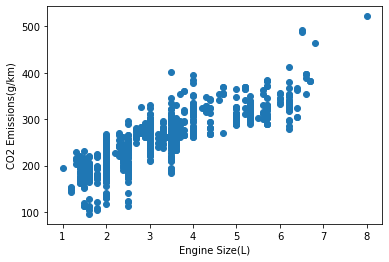

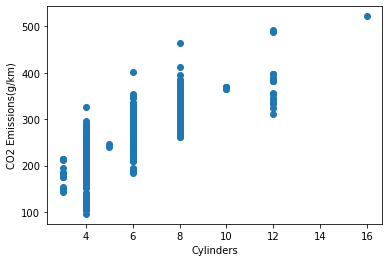

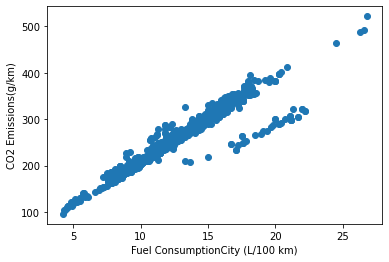

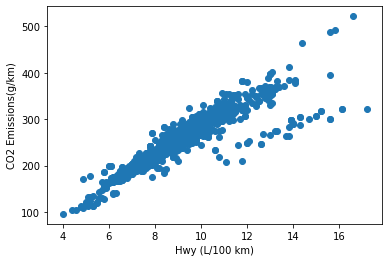

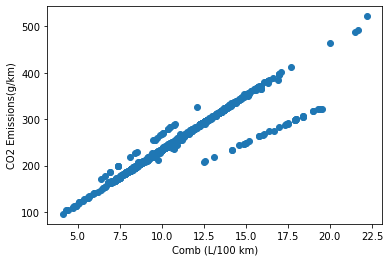

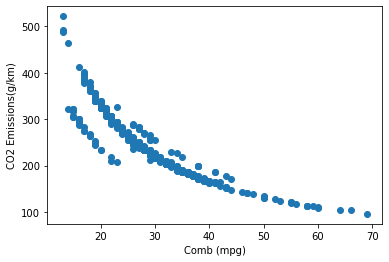

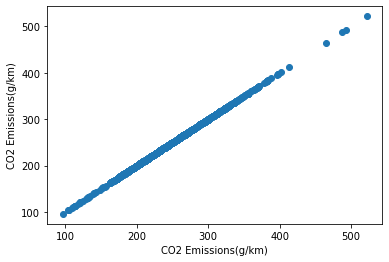

In [27]:
import matplotlib.pyplot as plt
for col in num_emission:
    y = 'CO2 Emissions(g/km)'
    x = col
    plt.scatter(num_emission[x], num_emission[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

## Feature Engineering

In [32]:
cat_emission.head()

,Make,Model.1,Vehicle Class,Transmission,FuelType
1,Acura,ILX,Compact,AM8,Z
2,Acura,MDX SH-AWD,SUV: Small,AS9,Z
3,Acura,MDX SH-AWD A-SPEC,SUV: Small,AS9,Z
4,Acura,MDX Hybrid AWD,SUV: Small,AM7,Z
5,Acura,NSX,Two-seater,AM9,Z


In [31]:
for col in cat_emission:
    print(f'{col}: {len(cat_emission[col].unique())} values')

Make: 39 values
Model.1: 748 values
Vehicle Class: 15 values
Transmission: 25 values
FuelType: 4 values


In [48]:
new_emission = pd.concat([pd.get_dummies(cat_emission[['FuelType']]),num_emission],axis=1)
new_emission

,FuelType_D,FuelType_E,FuelType_X,FuelType_Z,Engine Size(L),Cylinders,Fuel ConsumptionCity (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions(g/km)
1,0,0,0,1,2.4,4.0,9.9,7.0,8.6,33.0,199.0
2,0,0,0,1,3.5,6.0,12.2,9.0,10.8,26.0,252.0
3,0,0,0,1,3.5,6.0,12.2,9.5,11.0,26.0,258.0
4,0,0,0,1,3.0,6.0,9.1,9.0,9.0,31.0,210.0
5,0,0,0,1,3.5,6.0,11.1,10.8,11.0,26.0,261.0
...,...,...,...,...,...,...,...,...,...,...,...
1046,0,0,0,1,2.0,4.0,10.3,7.5,9.0,31.0,211.0
1047,0,0,0,1,2.0,4.0,11.3,8.5,10.0,28.0,233.0
1048,0,0,0,1,2.0,4.0,11.8,8.6,10.4,27.0,242.0
1049,0,0,0,1,2.0,4.0,11.3,8.5,10.0,28.0,233.0


## Data Spliting

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train, test = train_test_split(new_emission, test_size=0.25)
train.shape, test.shape

((787, 11), (263, 11))

## Data Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [51]:
y_train = train.pop('CO2 Emissions(g/km)')
y_test = test.pop('CO2 Emissions(g/km)')

In [54]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(train)
x_test = scaler.transform(test)

## Model Training

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
#Instantiate the model
model = LinearRegression()

In [57]:
model.fit(x_train,y_train)

LinearRegression()

## Model Testing

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
prediction = model.predict(x_test)

In [66]:
mean_absolute_error(y_test, prediction)

1.5914751076870803

In [67]:
mean_squared_error(y_test, prediction)

8.508338465146752

In [68]:
r2_score(y_test, prediction)

0.9970580276383214

In [69]:
model.coef_

array([ 51.88586969, -91.34490213,  20.02444293,  19.43458951,
         2.82362621,   1.2550034 , 163.86480957,  79.75807943,
       158.02376404, -17.57321809])

## Model Saving

In [70]:
import pickle as pkl

In [71]:
with open('emission_linear_model.pkl', 'wb') as file:
    pkl.dump(model, file)

## Inferencing

In [72]:
import pickle as pkl

In [74]:
with open('emission_linear_model.pkl', 'rb') as file:
    loaded_model = pkl.load(file)

In [75]:
loaded_model.coef_

array([ 51.88586969, -91.34490213,  20.02444293,  19.43458951,
         2.82362621,   1.2550034 , 163.86480957,  79.75807943,
       158.02376404, -17.57321809])

In [83]:
input = x_test[5]

In [84]:
input

array([0.        , 0.        , 1.        , 0.        , 0.61428571,
       0.38461538, 0.50442478, 0.54761905, 0.51933702, 0.14285714])

In [85]:
loaded_model.predict([input])

array([316.11970415])